In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

%matplotlib inline

In [10]:
train = pd.read_csv('C:/Users/maksim/Downloads/train (1).csv')
test = pd.read_csv('C:/Users/maksim/Downloads/test (1).csv')

In [104]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Sex_male         0
Sex_female       0
Embarked_C       0
Embarked_S       0
Embarked_Q       0
dtype: int64

In [12]:
test.Age = test.Age.fillna(train.Age.mean())
test.Embarked = test.Embarked.fillna('S')
test.Fare = test.Fare.fillna(train.Fare.mean())
test['Sex_male'] = test.Sex.apply(lambda x: '1' if x == 'male' else '0')
test['Sex_female'] = test.Sex.apply(lambda x: '0' if x == 'male' else '1')
test['Embarked_C'] = test.Embarked.apply(lambda x: '1' if x == 'C' else '0')
test['Embarked_S'] = test.Embarked.apply(lambda x: '1' if x == 'S' else '0')
test['Embarked_Q'] = test.Embarked.apply(lambda x: '1' if x == 'Q' else '0')
test_y = test.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [13]:
train.Age = train.Age.fillna(train.Age.mean())
train.Embarked = train.Embarked.fillna('S')
train.Fare = train.Fare.fillna(train.Fare.mean())
train['Sex_male'] = train.Sex.apply(lambda x: '1' if x == 'male' else '0')
train['Sex_female'] = train.Sex.apply(lambda x: '0' if x == 'male' else '1')
train['Embarked_C'] = train.Embarked.apply(lambda x: '1' if x == 'C' else '0')
train['Embarked_S'] = train.Embarked.apply(lambda x: '1' if x == 'S' else '0')
train['Embarked_Q'] = train.Embarked.apply(lambda x: '1' if x == 'Q' else '0')

In [16]:
X = train.drop(['PassengerId', 'Name','Sex', 'Ticket', 'Cabin', 'Survived', 'Embarked'], axis=1)
y = train.Survived

In [111]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Sex_female,Embarked_C,Embarked_S,Embarked_Q
0,3,22.0,1,0,7.2500,1,0,0,1,0
1,1,38.0,1,0,71.2833,0,1,1,0,0
2,3,26.0,0,0,7.9250,0,1,0,1,0
3,1,35.0,1,0,53.1000,0,1,0,1,0
4,3,35.0,0,0,8.0500,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,0,1,0
887,1,19.0,0,0,30.0000,0,1,0,1,0
888,3,30.0,1,2,23.4500,0,1,0,1,0
889,1,26.0,0,0,30.0000,1,0,1,0,0


In [51]:
test_y

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Sex_female,Embarked_C,Embarked_S,Embarked_Q
0,3,34.500000,0,0,7.8292,1,0,0,0,1
1,3,47.000000,1,0,7.0000,0,1,0,1,0
2,2,62.000000,0,0,9.6875,1,0,0,0,1
3,3,27.000000,0,0,8.6625,1,0,0,1,0
4,3,22.000000,1,1,12.2875,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
413,3,29.699118,0,0,8.0500,1,0,0,1,0
414,1,39.000000,0,0,108.9000,0,1,1,0,0
415,3,38.500000,0,0,7.2500,1,0,0,1,0
416,3,29.699118,0,0,8.0500,1,0,0,1,0


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [28]:
def classify(model):
    
    model.fit(X_train, y_train)
    print('Accuracy :', model.score(X_test, y_test))

    score = cross_val_score(model, X, y, cv=5)
    print('CVScore :', score.mean())

In [29]:
clf = RandomForestClassifier()
classify(clf)

Accuracy : 0.8654708520179372
CVScore : 0.8047454648170234


In [30]:
clf = tree.DecisionTreeClassifier()
classify(clf)

Accuracy : 0.8026905829596412
CVScore : 0.7721988575732849


In [31]:
clf = AdaBoostClassifier()
classify(clf)

C:\Users\maksim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\maksim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy : 0.8251121076233184


C:\Users\maksim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\maksim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\maksim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\maksim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default)

CVScore : 0.8025233820852427


In [33]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': range(8, 45),
    'min_samples_split': range(6, 20),
    'min_samples_leaf': range(1, 4),
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': range(80, 101, 2),
}
clf = tree.DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print('Best params :', grid_search.best_params_)
print('Best acc :', grid_search.best_score_)


Fitting 5 folds for each of 205128 candidates, totalling 1025640 fits
Best params : {'criterion': 'gini', 'max_depth': 18, 'max_features': None, 'max_leaf_nodes': 86, 'min_samples_leaf': 1, 'min_samples_split': 6, 'splitter': 'random'}
Best acc : 0.8233643811020087


In [34]:
best_params = {'criterion': 'gini', 
               'max_depth': 18, 
               'max_features': None, 
               'max_leaf_nodes': 86, 
               'min_samples_leaf': 1, 
               'min_samples_split': 6, 
               'splitter': 'best'}

In [41]:
param_grid_bagg = {
    'n_estimators': range(100, 400, 20),
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

base_model = tree.DecisionTreeClassifier(**best_params)
bagg_model = BaggingClassifier(estimator=base_model, random_state=0)

grid_search_bagg = GridSearchCV(estimator=bagg_model, param_grid=param_grid_bagg, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search_bagg.fit(X_train, y_train)

print('Best params :', grid_search_bagg.best_params_)
print('Best acc :', grid_search_bagg.best_score_)

y_pred = grid_search_bagg.best_estimator_.predict(X_test)

print('Acc :', accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best params : {'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 260}
Best acc : 0.8234092694422623
Acc : 0.874439461883408


In [46]:
param_grid_ab = {
    'n_estimators': range(100, 200, 15),
    'algorithm': ['SAMME', 'SAMME.R'],
    'learning_rate': range(0, 100, 5)
}
ab_model = AdaBoostClassifier()
grid_search_ab = GridSearchCV(estimator=ab_model, param_grid=param_grid_ab, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search_ab.fit(X_train, y_train)

print('Best params :', grid_search_ab.best_params_)
print('Best acc :', grid_search_ab.best_score_)

y_pred = grid_search_ab.best_estimator_.predict(X_test)

print('Acc :', accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


C:\Users\maksim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
70 fits failed out of a total of 1400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\maksim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maksim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\maksim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\b

Best params : {'algorithm': 'SAMME.R', 'learning_rate': 5, 'n_estimators': 100}
Best acc : 0.7873975984737964
Acc : 0.7982062780269058


In [98]:
param_grid_rf = {
    'n_estimators': range(100, 400, 15),
    'max_features': ['sqrt', 'log2', None]
}

rf_model = RandomForestClassifier(criterion=best_params['criterion'], 
                                  max_depth=best_params['max_depth'], 
                                  max_leaf_nodes=best_params['max_leaf_nodes'],
                                  min_samples_leaf=best_params['min_samples_leaf'],
                                  min_samples_split=best_params['min_samples_split']
)

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

print('Best params :', grid_search_rf.best_params_)
print('Best acc :', grid_search_rf.best_score_)
print('CrossVal score :', cross_val_score(grid_search_rf.best_estimator_, X, y, cv=5, scoring='accuracy', n_jobs=-1).mean())


y_pred = grid_search_rf.best_estimator_.predict(X_test)

print('Acc :', accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best params : {'max_features': None, 'n_estimators': 175}
Best acc : 0.8188194366513297
CrossVal score : 0.8260749482141735
Acc : 0.852017937219731


In [93]:
X_train['Sex_male'] = X_train['Sex_male'].apply(int)
X_train['Sex_female'] = X_train['Sex_female'].apply(int)
X_train['Embarked_C'] = X_train['Embarked_C'].apply(int)
X_train['Embarked_S'] = X_train['Embarked_S'].apply(int)
X_train['Embarked_Q'] = X_train['Embarked_Q'].apply(int)

X_test['Sex_male'] = X_test['Sex_male'].apply(int)
X_test['Sex_female'] = X_test['Sex_female'].apply(int)
X_test['Embarked_C'] = X_test['Embarked_C'].apply(int)
X_test['Embarked_S'] = X_test['Embarked_S'].apply(int)
X_test['Embarked_Q'] = X_test['Embarked_Q'].apply(int)

X['Sex_male'] = X['Sex_male'].apply(int)
X['Sex_female'] = X['Sex_female'].apply(int)
X['Embarked_C'] = X['Embarked_C'].apply(int)
X['Embarked_S'] = X['Embarked_S'].apply(int)
X['Embarked_Q'] = X['Embarked_Q'].apply(int)

In [104]:
param_grid_xgb = {'max_depth': range(1, 45, 5), 
                  ''
                  'n_estimators': range(1, 300, 20)}
xgb_model = XGBClassifier(learning_rate=0)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search_xgb.fit(X_train, y_train)

print('Best params :', grid_search_xgb.best_params_)
print('Best acc :', grid_search_xgb.best_score_)
print('CrossVal score :', cross_val_score(grid_search_xgb.best_estimator_, X, y, cv=5, scoring='accuracy', n_jobs=-1).mean())

y_pred = grid_search_xgb.best_estimator_.predict(X_test)

print('Acc :', accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best params : {'max_depth': 1, 'n_estimators': 1}
Best acc : 0.6152732577712939
CrossVal score : 0.6161634548992531
Acc : 0.6188340807174888


C:\Users\maksim\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [105]:
rf_model = RandomForestClassifier(n_estimators=175,
                                  max_depth=12,
                                  min_samples_split=6,
                                  min_samples_leaf=1,
                                  max_features=0.15,
                                  random_state=0
)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print('Acc :', accuracy_score(y_pred, y_test))

Acc : 0.8565022421524664


In [68]:
rf_model.fit(X, y)
res_pred = rf_model.predict(test_y)
output = pd.DataFrame({'PassengerId':test.PassengerId, 'Survived': res_pred})
output.to_csv('submission.csv', index=False)

In [66]:
clf = RandomForestClassifier()

In [67]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
pred = clf.predict(X_test)

In [69]:
accuracy_score(pred, y_test)

0.8116591928251121

In [28]:
clf = RandomForestClassifier()

In [29]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop=700, num=5)]
max_depth = [int(x) for x in np.linspace(start=1, stop=40, num = 3)]
min_samples_split = [int(x) for x in np.linspace(start = 1, stop = 20, num = 3)]
min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 20, num = 3)]
bootstrap = [True, False]
parametrs = {'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [30]:
rs = RandomizedSearchCV(clf, 
                        parametrs, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\maksim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
117 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
117 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\maksim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maksim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\maksim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

{'n_estimators': 250,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 40,
 'bootstrap': True}

In [31]:
rs_best_clf = rs.best_estimator_

In [32]:
rs_pred = rs_best_clf.predict(X_test)

In [33]:
accuracy_score(rs_pred, y_test)

0.7847533632286996

In [34]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,250,10,1,40,True,0.839858,1
1,400,10,1,20,True,0.839851,2
2,400,10,1,40,True,0.839844,3
3,250,20,1,40,False,0.838350,4
4,100,20,1,20,False,0.838343,5
5,700,20,1,20,False,0.836841,6
6,250,20,1,40,True,0.836841,6
7,700,20,1,20,True,0.836835,8
8,550,20,1,40,True,0.832350,9
9,100,20,1,20,True,0.832337,10


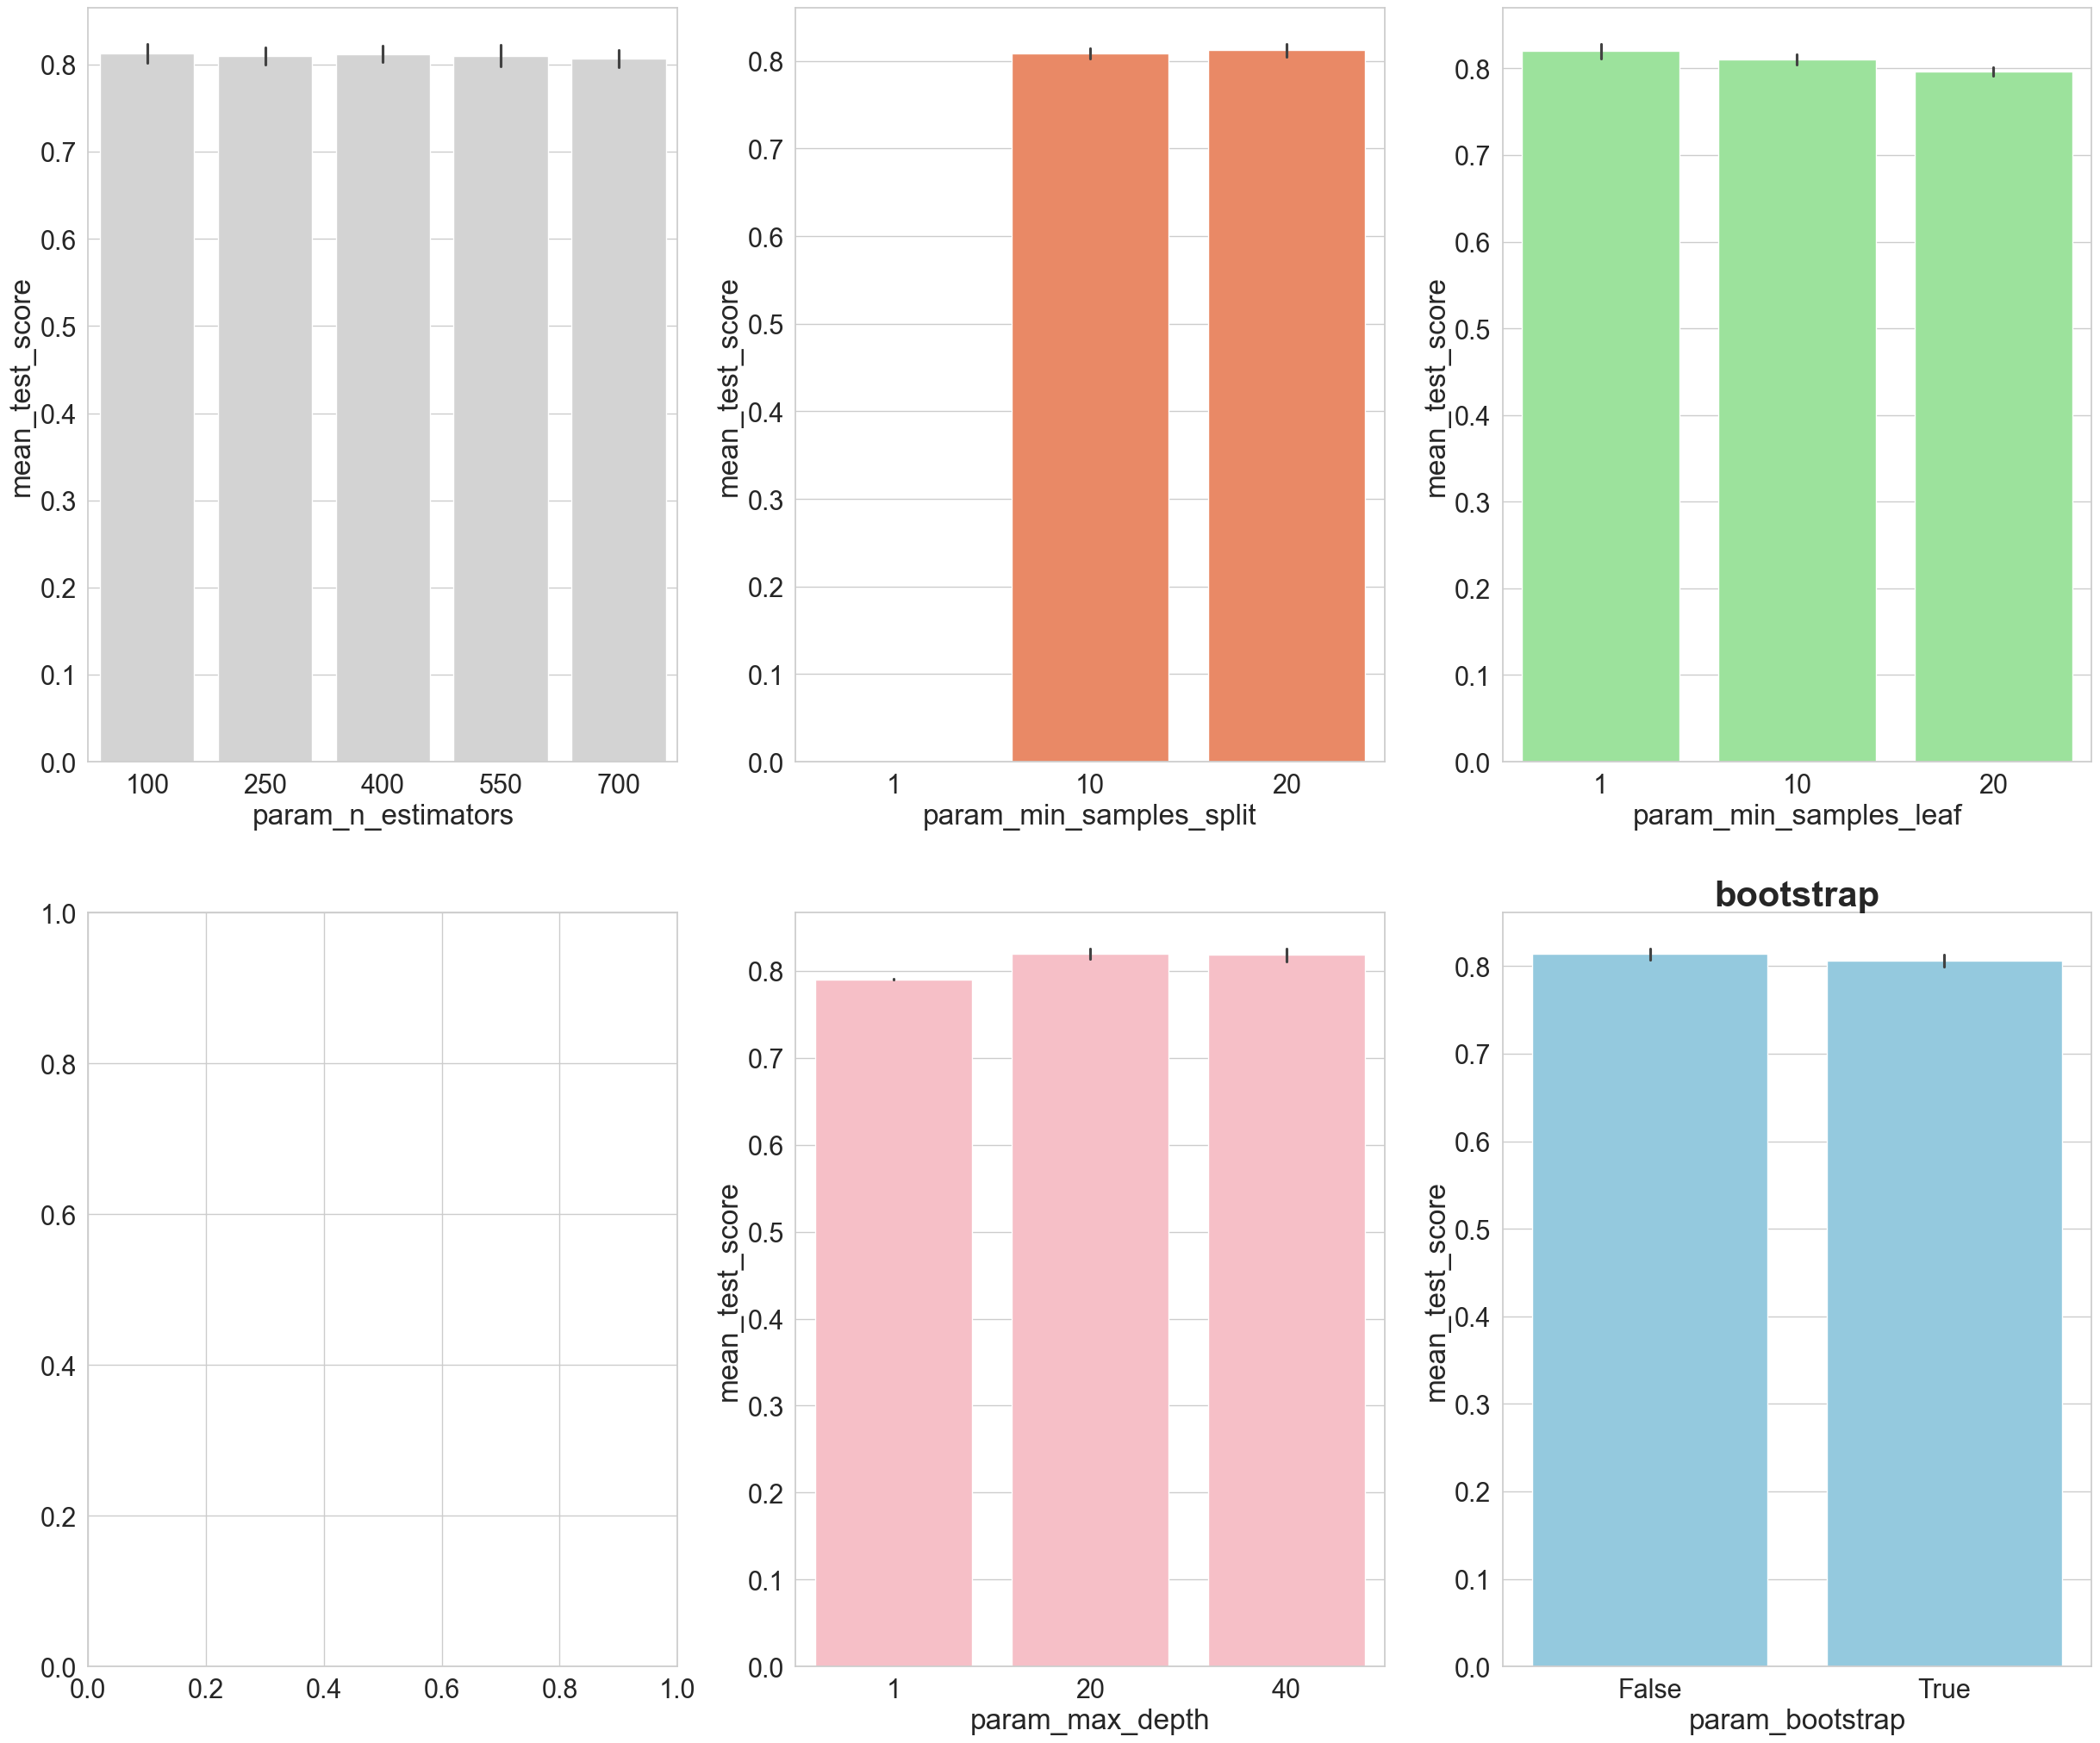

In [37]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 1)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')

sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')

sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')

sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')

axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

In [38]:
n_estimators = [int(x) for x in np.linspace(start = 350, stop=600, num=7)]
max_depth = [int(x) for x in np.linspace(start=20, stop=40, num = 3)]
min_samples_split = [int(x) for x in np.linspace(start = 7, stop = 25, num = 3)]
min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 2)]
bootstrap = [True, False]
parametrs = {'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [39]:
clf_rf = RandomForestClassifier()

In [86]:
n_estimators = [391, 350, 250]
min_samples_split = [15, 7, 10]
min_samples_leaf = [1]
max_depth = [30, 20, 19, 40]
bootstrap = [True, False]
max_features = [0.15, 0.22, 0.5]
parametrs = {'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap, 'max_features':max_features}

In [87]:
grid_search_sv_clf = GridSearchCV(clf_rf, parametrs, cv=3, n_jobs=-1, verbose = 1)

In [118]:
grid_search_sv_clf.fit(X, y)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [30, 20, 19, 40],
                         'max_features': [0.15, 0.22, 0.5],
                         'min_samples_leaf': [1],
                         'min_samples_split': [15, 7, 10],
                         'n_estimators': [391, 350, 250]},
             verbose=1)

In [119]:
grid_search_sv_clf.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 250}

In [120]:
best_frid_search_clf = grid_search_sv_clf.best_estimator_

In [116]:
grid_pred = best_frid_search_clf.predict(X_test)

In [57]:
n_estimators_values = range(1, 600)
scores_data = pd.DataFrame()
for n_estimators1 in n_estimators_values:
    ad_clf = AdaBoostClassifier(n_estimators=n_estimators1, random_state=0, algorithm="SAMME")
    ad_clf.fit(X_train, y_train)
    ad_pred = ad_clf.predict(X_test)
    
    test_score = accuracy_score(ad_pred, y_test)
    
    temp_score = pd.DataFrame({'n_estimators':[n_estimators1], 
                               'test_score':[test_score]})
    scores_data = pd.concat([scores_data, temp_score])
    

In [60]:
scores_data.sort_values(by='test_score')

,n_estimators,test_score
0,252,0.762332
0,171,0.766816
0,173,0.766816
0,172,0.766816
0,175,0.766816
...,...,...
0,375,0.793722
0,349,0.793722
0,350,0.793722
0,351,0.793722


In [95]:
ad_clf = AdaBoostClassifier(n_estimators=585, random_state=0, algorithm="SAMME")

In [122]:
ad_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=585, random_state=0)

In [123]:
ad_pred = ad_clf.predict(X_test)

In [93]:
print(accuracy_score(pred, y_test))
print(accuracy_score(rs_pred, y_test))
print(accuracy_score(grid_pred, y_test))

0.7847533632286996
0.7937219730941704
0.8071748878923767


In [124]:
print(accuracy_score(pred, y_test))
print(accuracy_score(rs_pred, y_test))
print(accuracy_score(grid_pred, y_test))
print(accuracy_score(ad_pred, y_test))

0.5201793721973094
0.5381165919282511
0.8385650224215246
0.8161434977578476


In [125]:
res_pred = best_frid_search_clf.predict(test_y)

In [126]:
output = pd.DataFrame({'PassengerId':test.PassengerId, 'Survived': res_pred})

In [127]:
output.to_csv('submission.csv', index=False)

In [7]:
train.Embarked = train.Embarked.fillna('S')